In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from LoadMultiFiles import LoadFileListUprootOptimized, LoadOneFileUproot

name_source = "Co60_0_0_17014.9"

dir_rec = LoadOneFileUproot(
    f"/afs/ihep.ac.cn/users/l/luoxj/TOFCalibration/Data/ACU/Co60/{name_source}/recQTMLE/user-root/user-recQTMLE-0.root",
    name_branch="TRec", return_list=False)
dir_rec_change_n = LoadOneFileUproot(
    f"/afs/ihep.ac.cn/users/l/luoxj/TOFCalibration/Data/ACU/Co60/{name_source}/recQTMLE_change_n/user-root/user-recQTMLE_change_n-0.root",
    name_branch="TRec", return_list=False)
dir_detsim = LoadOneFileUproot(
    f"/afs/ihep.ac.cn/users/l/luoxj/TOFCalibration/Data/ACU/Co60/{name_source}/detsim/user-root/user-detsim-0.root",
    name_branch="evt",return_list=False
)

dict_keys(['recx', 'recy', 'recz', 'recQx', 'recQy', 'recQz', 'recTx', 'recTy', 'recTz', 'recQTx', 'recQTy', 'recQTz', 'recQTt0', 'timeRecx', 'timeRecy', 'timeRecz', 'timeRecE', 'timeRect0', 'm_QR', 'm_TR', 'm_QTR', 'm_NQE', 'm_QEn', 'm_QTEn', 'm_PESum', 'm_Qstat', 'm_Tstat', 'm_QTstat', 'm_QL', 'm_TL', 'm_QTL', 'm_QRerr', 'm_TRerr', 'm_QTRerr', 'm_triggerT', 'm_dTriggerT', 'm_FadcEvtT', 'm_Qtime', 'm_Ttime', 'm_QTtime', 'm_memory', 'Truex', 'Truey', 'Truez', 'TrueQx', 'TrueQy', 'TrueQz', 'TrueR', 'TrueQR', 'edep'])
dict_keys(['evtID', 'edep', 'edepX', 'edepY', 'edepZ', 'nPhotons', 'totalPE', 'LpmtPE', 'SpmtPE', 'NNVTPE', 'HamaPE', 'CDPE', 'WPPE'])


Text(0.5, 0, '$\\Delta z\\ [ mm ]$')

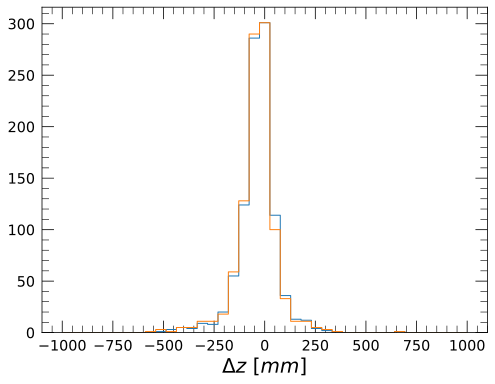

In [2]:
print(dir_rec.keys())
print(dir_detsim.keys())
delta_R =  ( (dir_rec["recx"]-dir_detsim["edepX"])**2+
        (dir_rec["recy"]-dir_detsim["edepY"])**2+
        (dir_rec["recz"]-dir_detsim["edepZ"])**2 ) **0.5
bins_delta_z = np.linspace(-1000,1000,40)
delta_z = dir_rec["recz"]-dir_detsim["edepZ"]

delta_z_change_n = dir_rec_change_n["recz"][:1000]-dir_detsim["edepZ"]

plt.figure()
plt.hist(delta_z,bins=bins_delta_z,histtype="step")
plt.hist(delta_z_change_n,bins=bins_delta_z,histtype="step")
plt.xlabel("$\Delta z\ [ mm ]$")

# plt.semilogy()


OBJ: TStyle	dybStyle	Daya Bay Style : 0 at: 0x5571878d1d60
Welcome to JupyROOT 6.22/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(DeltaZ) TTree Float_t branch DeltaZ will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #860 because DeltaZ cannot accommodate the value -25414.6
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #969 because DeltaZ cannot accommodate the value -14320.7
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 2 out-of-range events
[#1] INFO:Eval -- RooRealVar::setRange(DeltaZ) new range named 'signal' created with bounds [-200,200]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_gauss_data) const

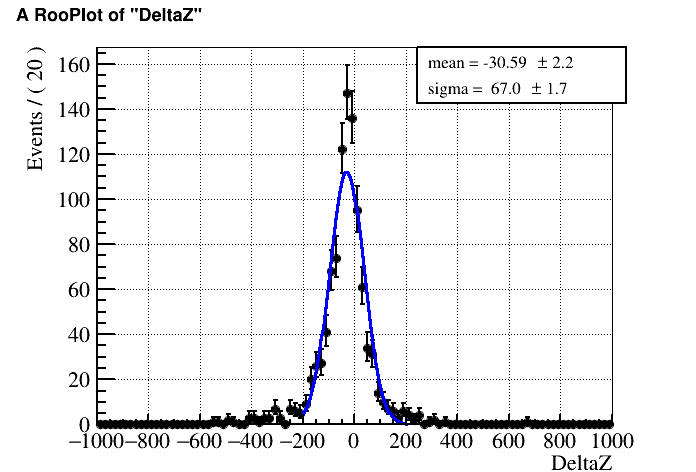

d.f evaluates to zero @ x=DeltaZ=-34.0156, mean=mean=-18.1412, sigma=sigma=0.280412
     getLogVal() top-level p.d.f evaluates to zero @ x=DeltaZ=22.9219, mean=mean=-18.1412, sigma=sigma=0.280412
     getLogVal() top-level p.d.f evaluates to zero @ x=DeltaZ=89.6484, mean=mean=-18.1412, sigma=sigma=0.280412
    ... (remaining 764 messages suppressed)

[#0] WARNING:Minization -- RooMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (6713.79) to force MIGRAD to back out of this region. Error log follows
Parameter values: mean=-33.811, sigma=0.986068
RooNLLVar::nll_gauss_data[ paramSet=(mean,sigma) ]
     function value is NAN @ paramSet=(mean = -33.811,sigma = 0.986068)
RooGaussian::gauss[ x=DeltaZ mean=mean sigma=sigma ]
     getLogVal() top-level p.d.f evaluates to zero @ x=DeltaZ=-72.5156, mean=mean=-33.811, sigma=sigma=0.986068
     getLogVal() top-level p.d.f evaluates to zero @ x=DeltaZ=29.6309, mean=mean=-33.811, sigma=sigma=0.986068
     getLogVal() to

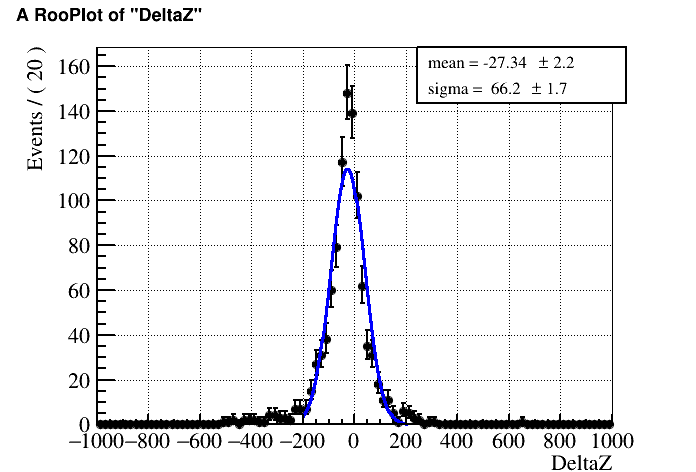

In [3]:
import ROOT
from importlib import reload
import RooFitTools
reload(RooFitTools)
from RooFitTools import ArrayToTree

for i, delta_z_tmp in enumerate([delta_z_change_n,delta_z]):

    x_min, x_max = -1000, 1000
    x = ROOT.RooRealVar("DeltaZ", "DeltaZ", x_min, x_max)
    mean = ROOT.RooRealVar("mean", "mean", 0, x_min, x_max )
    sigma = ROOT.RooRealVar("sigma", "sigma", 100, 0.1, 500)

    gauss = ROOT.RooGaussian("gauss", "gauss", x, mean, sigma)

    tree_delta_z = ArrayToTree(delta_z_tmp,name_in_tree='DeltaZ')
    data_delta_z = ROOT.RooDataSet("data", "data", ROOT.RooArgSet(x), ROOT.RooFit.Import(tree_delta_z))

    x.setRange("signal", -200, 200)

    fit_result = gauss.fitTo(data_delta_z, ROOT.RooFit.Range("signal"), ROOT.RooFit.Save())
    # print("Chi2:\t", fit_result.minNll())

    locals()[f"c{i}"] = ROOT.TCanvas(f"c_time_{i}","")
    xframe = x.frame()
    data_delta_z.plotOn(xframe)
    gauss.plotOn(xframe)
    gauss.paramOn(xframe, ROOT.RooFit.Layout(0.6,0.9,0.9),ROOT.RooFit.ShowConstants(True))
    xframe.Draw()
    locals()[f"c{i}"].Draw()


